# Discretization tutorial

## Discretization

The *features* are discretized based on selected discretization scheme. Three discretization schemes are curreltly available:  **combinatorial**. 


**Combinatorial** Discretize, for each frame, which combinations of regions are occupied by all ligands in the system (one state per frame)

Set the region boundaries *regions*. The minimum (0) and maximum (max) value are implicit.\
E.g.: regions (4.5, 10, 24) corresponds to: \
region 1 -  (0, 4.5( \
region 2 - (4.5, 10( \
region 3 - (10, 24( \
region 4 - (24, max( \
\
Labels *labels* of each region are optional but recommended (otherwise reverts to numerical). Number of *labels* is plus one the number of defined *regions*.

l1          calb                               ...                           \
l2          MeOH                               ...                            
l3          50mM                               ... 5.5M                       
l4             1  2  3   4   5  6  7  8  9 10  ...    1   2   3   4   5   6   
Frame index                                    ...                            
0              3  3  1   7   3  3  1  3  3  1  ...   31  15  15  15  27  27   
1              3  3  1   7   3  3  1  3  3  1  ...   31  15  15  15  27  27   
2              3  3  1  11   3  3  1  3  3  1  ...   31  15  15  11  31  27   
3              3  3  1  11   3  3  1  1  3  1  ...   31  15  15  15  31  27   
4              3  3  1   7   3  3  1  3  3  1  ...   31  15  31  15  31  15   
...          ... .. ..  ..  .. .. .. .. .. ..  ...  ...  ..  ..  ..  ..  ..   
19995          1  3  1   3   7  1  3  1  1  3  ...   31  15  31  15  31  31   
19996          1  1  1   3   7  1  3  1  1  3  ...  

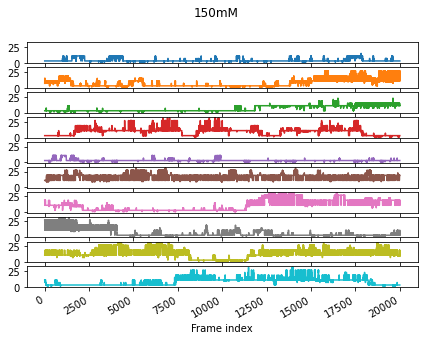

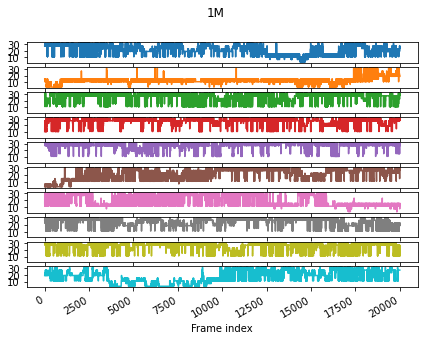

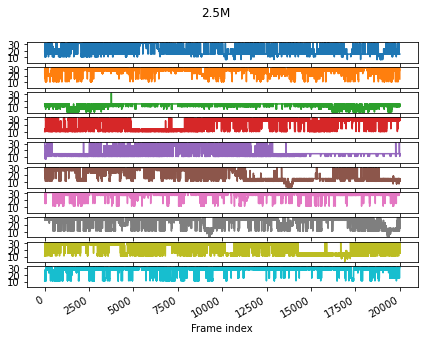

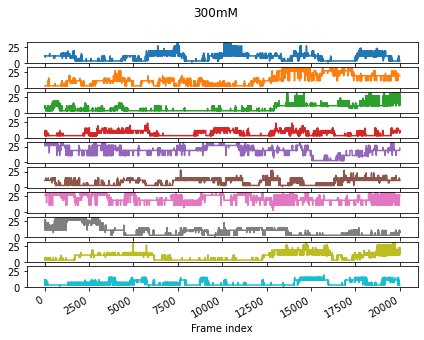

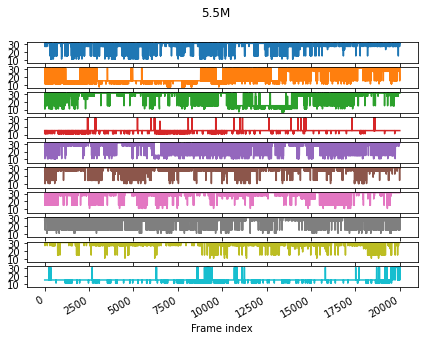

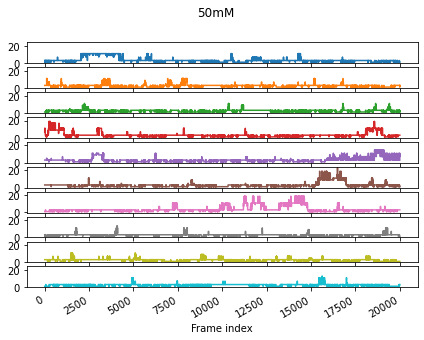

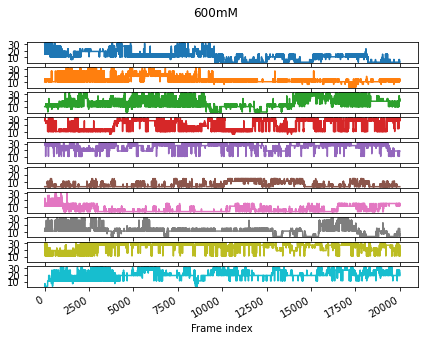

In [10]:
importlib.reload(main)

shells=[4.5, 10, 12, 24]
labels=['A', 'P', 'E', 'S', 'B'] 

discretize=main.Discretize(project_systems, feature=features['nac'], results=results)
combinatorial=discretize.combinatorial(shells, labels=labels)

print(combinatorial)

#TODO: Make a proper function.
sampled_states_trj={}

for trajectory in combinatorial.columns:
    sampled_states_trj[trajectory]=pd.unique(combinatorial[trajectory].values.flatten()) 

discretize.plot(combinatorial)